Epoch 100/10000, Loss: 40.2914)
Epoch 200/10000, Loss: 37.6799)
Epoch 300/10000, Loss: 35.3187)
Epoch 400/10000, Loss: 33.1249)
Epoch 500/10000, Loss: 31.0863)
Epoch 600/10000, Loss: 29.1917)
Epoch 700/10000, Loss: 27.4309)
Epoch 800/10000, Loss: 25.7942)
Epoch 900/10000, Loss: 24.2727)
Epoch 1000/10000, Loss: 22.8583)
Epoch 1100/10000, Loss: 21.5434)
Epoch 1200/10000, Loss: 20.3208)
Epoch 1300/10000, Loss: 19.1842)
Epoch 1400/10000, Loss: 18.1273)
Epoch 1500/10000, Loss: 17.1446)
Epoch 1600/10000, Loss: 16.2309)
Epoch 1700/10000, Loss: 15.3812)
Epoch 1800/10000, Loss: 14.5911)
Epoch 1900/10000, Loss: 13.8564)
Epoch 2000/10000, Loss: 13.1732)
Epoch 2100/10000, Loss: 12.5378)
Epoch 2200/10000, Loss: 11.9470)
Epoch 2300/10000, Loss: 11.3976)
Epoch 2400/10000, Loss: 10.8866)
Epoch 2500/10000, Loss: 10.4115)
Epoch 2600/10000, Loss: 9.9696)
Epoch 2700/10000, Loss: 9.5587)
Epoch 2800/10000, Loss: 9.1765)
Epoch 2900/10000, Loss: 8.8212)
Epoch 3000/10000, Loss: 8.4907)
Epoch 3100/10000, Loss: 

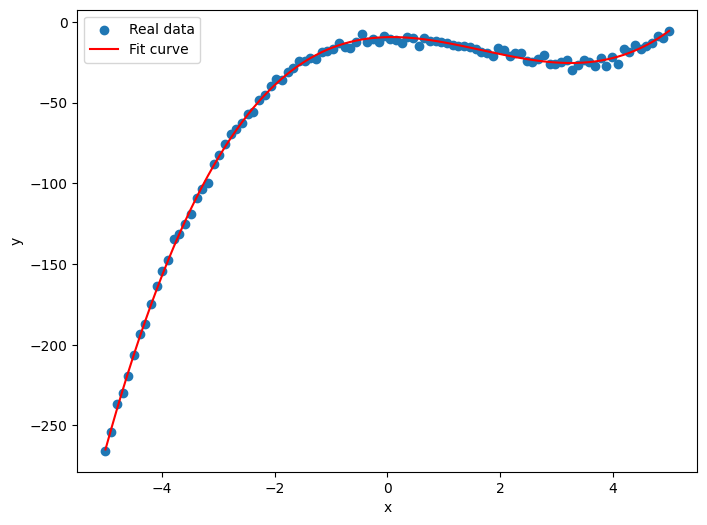

In [1]:
#----------------------------------------------------------------
#  Generate random data for a cubic function x**3 - 5*x**2 + x - 10 
#  Use gradient descent to find the fitted function 
#----------------------------------------------------------------

import torch
import numpy as np 
import matplotlib.pyplot as plt 
from torch import nn 
torch.manual_seed(16)

# Generate random data for a quadratic function 
# x**3 - 5*x**2 + x - 10 
def generate_cubic_data(num_samples):
    x = torch.linspace(-5, 5, num_samples)
    y = x**3 - 5*x**2 + x - 10  + torch.randn(num_samples)*2
    return x, y

# Define a cubic function model
# x**3 - 5*x**2 + x - 10 
def cubic_model(x, params):
    a, b, c, d = params
    return a*x**3 + b*x**2 + c*x + d

# Def the loss function (mean squar error)
def mean_square_error(y_true, y_pred):
    return torch.mean((y_true - y_pred) ** 2)

# Define gradient descent 
def gradient_descent(x, y, learning_rate, num_epochs):
    # initial model parameters randomly 
    params = torch.randn(4, requires_grad=True)

    for epoch in range(num_epochs): 
        # Calculate the model predictions 
        y_pred = cubic_model(x, params)

        # calculate the loss function 
        loss = mean_square_error(y, y_pred)

        # calculate gradients and update parameters 
        loss.backward()      
        with torch.no_grad():
            params.data -= learning_rate * params.grad.data 

        # clear the gradient 
        params.grad.zero_()

        if (epoch+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f})')

    return params

# generate data 
num_samples = 100 
x, y = generate_cubic_data(num_samples=num_samples)

learning_rate = 0.00041
num_epochs = 10000

optimal_params = gradient_descent(x, y, learning_rate, num_epochs)

# plot the fitted curve 
x_test = torch.linspace(-5, 5, 100)
y_pred = cubic_model(x_test, optimal_params)
# output fitted parameters 
print(f'Fitted parameters : a = {optimal_params[0]:.2f}, b = {optimal_params[1]:.2f}, c = {optimal_params[2]:.2f} , d = {optimal_params[3]:.2f}')

plt.figure(figsize=(8,6))
plt.scatter(x.numpy(), y.numpy(), label='Real data')
plt.plot(x_test.numpy(), y_pred.detach().numpy(), 'r-', label='Fit curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()